In [1]:
# Imports
import pandas as pd
import time
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Data preprocessing

# kaggle fake news dataset
kaggle_train = pd.read_csv(r'.\data\fake-news\train.csv')
kaggle_test = pd.read_csv(r'.\data\fake-news\test.csv')
results = pd.read_csv(r'.\data\fake-news\submit.csv')

kaggle_train_labels = []
for label in kaggle_train["label"].values:
    if label == 0:
        kaggle_train_labels.append(1)
    else:
        kaggle_train_labels.append(0)
kaggle_train_labels = np.array(kaggle_train_labels)        
        
kaggle_test_labels = []
for label in results["label"].values:
    if label == 0:
        kaggle_test_labels.append(1)
    else:
        kaggle_test_labels.append(0)
kaggle_test_labels = np.array(kaggle_test_labels) 

kaggle_train.drop('label',axis=1)
kaggle_train = kaggle_train.fillna('no data')
kaggle_test = kaggle_test.fillna('no data')

# liar dataset
liar_train = pd.read_csv(r'.\data\liar_dataset\train.tsv', sep="\t", header=None).values
liar_test = pd.read_csv(r'.\data\liar_dataset\test.tsv', sep="\t", header=None).values

# Changing labels from descriptors to 0/1
# pants-fire, false, barely-true, half-true = 0
# mostly-true, true = 1

for i in range(0, len(liar_train)):
    if liar_train[i, 1] in ["mostly-true", "true"]:
        liar_train[i, 1] = 1
    else:
        liar_train[i, 1] = 0

liar_train_labels = liar_train[:, 1].astype('int')
        
for i in range(0, len(liar_test)):
    if liar_test[i, 1] in ["mostly-true", "true"]:
        liar_test[i, 1] = 1
    else:
        liar_test[i, 1] = 0        

liar_test_labels = liar_test[:, 1].astype('int')

vals = kaggle_train["text"].values

0.05186152458190918
Naive Bayes on the kaggle dataset
Mean accuracy:0.5934615384615385


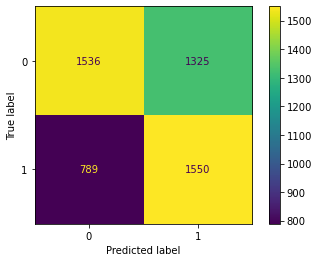

In [3]:
# Bayes

v=CountVectorizer()
x_train_count=v.fit_transform((kaggle_train["text"] + " " + kaggle_train["title"]).values)

t0 = time.time()

model=MultinomialNB()
model.fit(x_train_count,kaggle_train_labels)

print(time.time() - t0)

x_test_count=v.transform((kaggle_test["text"] + " " + kaggle_test["title"]).values)
prediction = model.predict(x_test_count)

print("Naive Bayes on the kaggle dataset")
print("Mean accuracy:" + str(metrics.accuracy_score(kaggle_test_labels, prediction)))

cm = metrics.confusion_matrix(kaggle_test_labels, prediction)

cm_display = ConfusionMatrixDisplay(cm).plot()

0.03287529945373535
Naive Bayes on the liar dataset
Mean accuracy:0.654301499605367


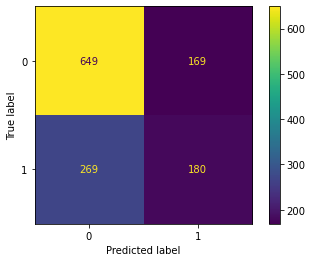

In [4]:
v=CountVectorizer()
x_train_count=v.fit_transform(liar_train[:, 2])

t0 = time.time()

model=MultinomialNB()
model.fit(x_train_count,liar_train_labels)

x_test_count=v.transform(liar_test[:, 2])
prediction = model.predict(x_test_count)

print(time.time() - t0)

print("Naive Bayes on the liar dataset")
print("Mean accuracy:" + str(metrics.accuracy_score(liar_test_labels, prediction)))

cm = metrics.confusion_matrix(liar_test_labels, prediction)

cm_display = ConfusionMatrixDisplay(cm).plot()

1.3781611919403076
Logistic regression on the kaggle dataset
Mean accuracy:0.63


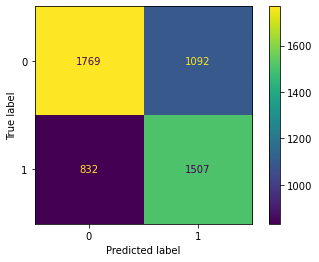

In [5]:
# Logistic regression

v=CountVectorizer()
x_train_count=v.fit_transform((kaggle_train["text"] + " " + kaggle_train["title"]).values)

t0 = time.time()

model=SGDClassifier(loss='log')
model.fit(x_train_count,kaggle_train_labels)

print(time.time() - t0)

x_test_count=v.transform((kaggle_test["text"] + " " + kaggle_test["title"]).values)
prediction = model.predict(x_test_count)

print("Logistic regression on the kaggle dataset")
print("Mean accuracy:" + str(metrics.accuracy_score(kaggle_test_labels, prediction)))

cm = metrics.confusion_matrix(kaggle_test_labels, prediction)

cm_display = ConfusionMatrixDisplay(cm).plot()

0.20943856239318848
Logistic regression on the liar dataset
Mean accuracy:0.6369376479873717


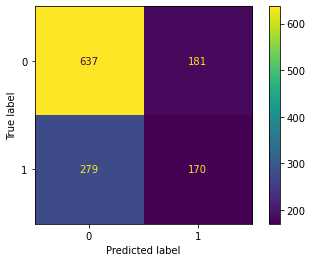

In [6]:
 
v=CountVectorizer()
x_train_count=v.fit_transform(liar_train[:, 2])

t0 = time.time()

model=SGDClassifier(loss='log')
model.fit(x_train_count,liar_train_labels)

print(time.time() - t0)

x_test_count=v.transform(liar_test[:, 2])
prediction = model.predict(x_test_count)

print("Logistic regression on the liar dataset")
print("Mean accuracy:" + str(metrics.accuracy_score(liar_test_labels, prediction)))

cm = metrics.confusion_matrix(liar_test_labels, prediction)

cm_display = ConfusionMatrixDisplay(cm).plot()

539.044846534729
SVM on the kaggle dataset
Mean accuracy:0.6461538461538462


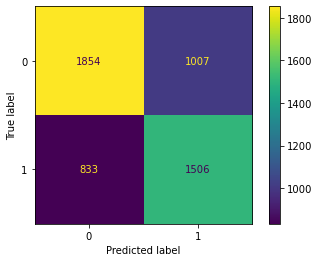

In [7]:
# SVM

v=CountVectorizer()
x_train_count=v.fit_transform((kaggle_train["text"] + " " + kaggle_train["title"]).values)

t0 = time.time()

model=SVC()
model.fit(x_train_count,kaggle_train_labels)

print(time.time() - t0)

x_test_count=v.transform((kaggle_test["text"] + " " + kaggle_test["title"]).values)
prediction = model.predict(x_test_count)

print("SVM on the kaggle dataset")
print("Mean accuracy:" + str(metrics.accuracy_score(kaggle_test_labels, prediction)))

cm = metrics.confusion_matrix(kaggle_test_labels, prediction)

cm_display = ConfusionMatrixDisplay(cm).plot()

26.333890199661255
SVM on the liar dataset
Mean accuracy:0.6511444356748224


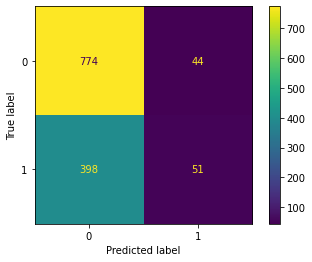

In [8]:
v=CountVectorizer()
x_train_count=v.fit_transform(liar_train[:, 2])

t0 = time.time()

model=SVC()
model.fit(x_train_count,liar_train_labels)

print(time.time() - t0)

x_test_count=v.transform(liar_test[:, 2])
prediction = model.predict(x_test_count)

print("SVM on the liar dataset")
print("Mean accuracy:" + str(metrics.accuracy_score(liar_test_labels, prediction)))

cm = metrics.confusion_matrix(liar_test_labels, prediction)

cm_display = ConfusionMatrixDisplay(cm).plot()
